# Sayaji Chavan
# Task : Prediction using Supervised Learning


In [41]:
#Import all libraries and the data
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn import metrics
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data  = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

In [42]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [43]:
#check the data for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [44]:
data.shape

(25, 2)

In [45]:
data.count()

Hours     25
Scores    25
dtype: int64

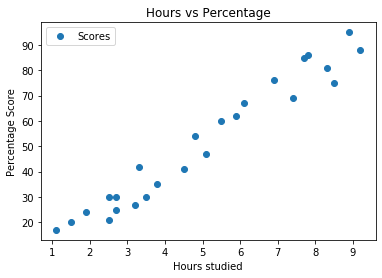

In [55]:
#visualise raw data
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(x = "Hours", y = 'Scores', style ='o')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')
plt.show()

# Model

In [47]:
# Assigning dependent and independent variables
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [48]:
#Splitting the data into training and test values
#split ratio is 20:80
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [49]:
#Training the model
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Training Finished')

Training Finished


# Predictions

In [50]:
print(x_test)
y_pred = lr.predict(x_test)
df = pd.DataFrame({'Real_y' : y_test, 'Pred_y': y_pred})
df

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


,Real_y,Pred_y
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


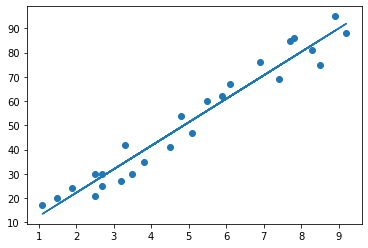

In [56]:
# plot the reg line
line = lr.coef_ * x + lr.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Answer

In [58]:

hours = 9.25
own_pred = lr.predict(np.array([hours]).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


# Evaluation

In [59]:
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Mean Square Error: {}'.format(mse))
print('Mean Absolute Error: {}'.format(mae))
print('R2 Score: {}'.format(r2_score))

Mean Square Error: 18.943211722315272
Mean Absolute Error: 2.9679122599610217
R2 Score: 0.9678055545167994
